In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import RFE
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from tabulate import tabulate
import itertools

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Intrusion Detection/Train_data.csv')


In [ ]:
test=pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Intrusion Detection/Test_data.csv')

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.0,0.0,0.0,0.0,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.0,1.0,0.0,0.0,anomaly
25191,0,tcp,finger,S0,0,0,0,0,0,0,...,49,0.19,0.03,0.01,0.00,1.0,1.0,0.0,0.0,anomaly


In [ ]:
train['class'].unique()

array(['normal', 'anomaly'], dtype=object)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [ ]:
train.shape

(25192, 42)

In [ ]:

# Count of each unique target value
class_counts = train['class'].value_counts()

print("Target value counts:\n", class_counts)

Target value counts:
 class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [ ]:
train.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
total=train.shape[0]
missing_columns =[col for col in train.columns if train[col].isnull().sum()> 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total)*100
    print(f"{col}: {null_count} ({round(per,3)}%)")

In [ ]:
print(f"Number of Duplicate rows: {train.duplicated().sum()}")

Number of Duplicate rows: 0


<Axes: xlabel='class', ylabel='count'>

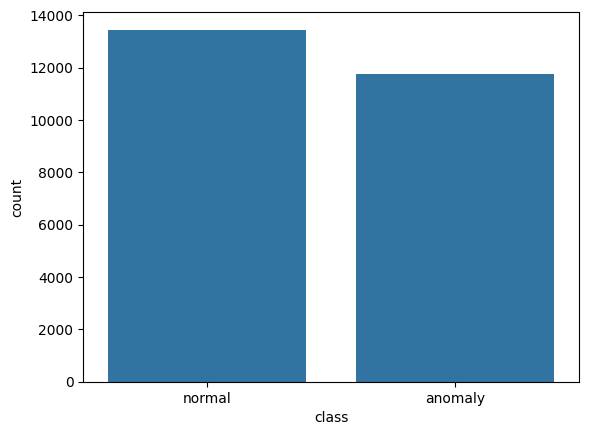

In [ ]:
import seaborn as sns
sns.countplot(x=train['class'])


In [ ]:
print("Class distribution Training set:")
print(train['class'].value_counts())

Class distribution Training set:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [ ]:
# def le(df):
#   for col in df.columns:
#     if df[col].dtype=='object':
#       label_encoder=LabelEncoder()
#       df[col]=label_encoder.fit_transform(df[col])
# le(train)
# le(test)

## Dictionary to store encoders for each column
encoders = {}

# Get a list of object type columns (categorical features) from train
object_cols = train.select_dtypes(include=['object']).columns.tolist()

# Exclude the 'class' column from object_cols if it's present
object_cols = [col for col in object_cols if col != 'class']

# Apply label encoding to object columns in train and test
for col in object_cols:
    le = LabelEncoder()
    # Fit on the combined unique values from both train and test
    # (but only for the selected object columns, excluding 'class')
    le.fit(pd.concat([train[col], test[col]], ignore_index=True).unique())
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])
    encoders[col] = le



In [ ]:
train.drop(['num_outbound_cmds'],axis=1,inplace=True)
test.drop(['num_outbound_cmds'],axis=1,inplace=True)

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
X_train = train.drop(['class'],axis=1)
Y_train = train['class']

In [ ]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate']

In [ ]:
X_train = X_train[selected_features]

In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=42)

In [ ]:
x_train.shape

(17634, 10)

In [ ]:
x_test.shape

(7558, 10)

In [ ]:
y_train.shape

(17634,)

In [ ]:
y_test.shape

(7558,)

In [ ]:
import time

In [ ]:
from sklearn.linear_model import LogisticRegression
clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(x_train,y_train.values.ravel())
end_time=time.time()
print("Training time:", end_time - start_time)

Training time: 0.14237523078918457


In [ ]:
start_time=time.time()
y_test_pred_l = clfl.predict(x_test)
end_time=time.time()
print("Testing time:", end_time - start_time)

Testing time: 0.0019240379333496094


In [ ]:
lg_model=LogisticRegression(random_state=42)
lg_model.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
lg_train,lg_test=lg_model.score(x_train,y_train),lg_model.score(x_test,y_test)
print(f"Training Score: {lg_train}\nTesting Score: {lg_test}")

Training Score: 0.9418169445389588
Testing Score: 0.9437681926435565


In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 22.5 MB/s eta 0:00:00


In [ ]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
def objective(trial):
  n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16,log=False)
  classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
  # Use x_train and y_train for fitting the model
  classifier_obj.fit(x_train, y_train)
  accuracy= classifier_obj.score(x_test,y_test)
  return accuracy

In [ ]:
study_knn=optuna.create_study(direction='maximize')
study_knn.optimize(objective, n_trials=1)
print(study_knn.best_trial)

FrozenTrial(number=0, state=1, values=[0.9810796507012437], datetime_start=datetime.datetime(2025, 4, 25, 9, 18, 4, 948599), datetime_complete=datetime.datetime(2025, 4, 25, 9, 18, 6, 430104), params={'KNN_n_neighbors': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=study_knn.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train,y_train)
KNN_train,KNN_test=KNN_model.score(x_train,y_train),KNN_model.score(x_test,y_test)
print(f"Training Score: {KNN_train}\nTesting Score: {KNN_test}")

Training Score: 0.9817398208007259
Testing Score: 0.9810796507012437


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clfd=DecisionTreeClassifier(criterion="entropy",max_depth=4)
start_time = time.time()
clfd.fit(x_train,y_train.values.ravel())
end_time=time.time()
print("Training time:", end_time - start_time)

Training time: 0.08209729194641113


In [ ]:
def objective(trial):
  dt_max_depth = trial.suggest_int('DT_max_depth', 2, 32,log=False)
  dt_max_features = trial.suggest_int('DT_max_features', 2, 10,log=False)
  classifier_obj = DecisionTreeClassifier(max_depth=dt_max_depth,max_features=dt_max_features)
  classifier_obj.fit(x_train, y_train)
  accuracy= classifier_obj.score(x_test,y_test)
  return accuracy

In [ ]:
study_dt=optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=1)
print(study_dt.best_trial)

FrozenTrial(number=0, state=1, values=[0.9953691452765282], datetime_start=datetime.datetime(2025, 4, 25, 9, 18, 10, 928081), datetime_complete=datetime.datetime(2025, 4, 25, 9, 18, 11, 50257), params={'DT_max_depth': 19, 'DT_max_features': 9}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'DT_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'DT_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=0, value=None)


In [ ]:
dt=DecisionTreeClassifier(max_depth=study_dt.best_trial.params['DT_max_depth'],max_features=study_dt.best_trial.params['DT_max_features'])
dt.fit(x_train,y_train)
dt_train,dt_test=dt.score(x_train,y_train),dt.score(x_test,y_test)
print(f"Training Score: {dt_train}\nTesting Score: {dt_test}")

Training Score: 0.9999432913689463
Testing Score: 0.9947075946017465


In [ ]:
data=[["KNN",KNN_train,KNN_test],
      ["Logistic Regression",lg_train,lg_test],
      ["Decision Tree",dt_train,dt_test]]

col_names=["Model","Train Score ","Test Score"]
print(tabulate(data,headers=col_names,tablefmt="fancy_grid"))

╒═════════════════════╤════════════════╤══════════════╕
│ Model               │   Train Score  │   Test Score │
╞═════════════════════╪════════════════╪══════════════╡
│ KNN                 │       0.98174  │     0.98108  │
├─────────────────────┼────────────────┼──────────────┤
│ Logistic Regression │       0.941817 │     0.943768 │
├─────────────────────┼────────────────┼──────────────┤
│ Decision Tree       │       0.999943 │     0.994708 │
╘═════════════════════╧════════════════╧══════════════╛


In [ ]:
SEED=42
#Decision tree model
dtc=DecisionTreeClassifier()
#KNN
knn=KNeighborsClassifier()
#Logistic Regression model
lr=LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
models={}
models['LogisticRegression']=lr
models['DecisionTreeClassifier']=dtc
models['KNeighborsClassifier']=knn

In [ ]:


# Mapping numeric labels to string labels
labels_map = {0: 'normal', 1: 'anomaly'}
# ----> Invert the labels_map
reverse_labels_map = {v: k for k, v in labels_map.items()}

# Example model predictions (numeric labels)
# Choose a model from the 'models' dictionary:
model = models['DecisionTreeClassifier'] # Example: Using DecisionTreeClassifier
# Fit the model before making predictions:
model.fit(x_train, y_train)  # This line is added to fit the model

y_pred_numeric = model.predict(x_test)  # Replace X_test with your input data

# ----> Convert the string predictions to numeric labels using the inverted map
y_pred = [reverse_labels_map.get(label, -1) for label in y_pred_numeric] # If label is not found, default to -1

# Now use the numeric labels for evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test.map(reverse_labels_map), y_pred, target_names=['normal', 'anomaly']))  # Replace y_test with actual true labels

              precision    recall  f1-score   support

      normal       1.00      0.99      1.00      4042
     anomaly       0.99      1.00      0.99      3516

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score

models = {}
models['LogisticRegression'] = lr
models['DecisionTreeClassifier'] = dtc
models['KNeighborsClassifier'] = knn

# Initialize the scores dictionary before the loop
scores = {}

# Define scorers with the correct pos_label
precision_scorer = make_scorer(precision_score, pos_label='anomaly')
recall_scorer = make_scorer(recall_score, pos_label='anomaly')

for name in models:
    scores[name] = {}
    for scorer, scorer_name in [(precision_scorer, 'precision'), (recall_scorer, 'recall')]:
        # Calculate cross-validation scores using the custom scorers
        scores[name][scorer_name] = cross_val_score(models[name], x_train, y_train, cv=10, scoring=scorer)

def line(name):
    return '*' * (25 - len(name) // 2)

for name in models:
    print(line(name), name, 'Model Validation', line(name))

    for scorer in ['precision', 'recall']:
        mean = round(np.mean(scores[name][scorer]) * 100, 2)
        stdev = round(np.std(scores[name][scorer]) * 100, 2)
        print("Mean {}: ".format(scorer), "\n", mean, "%", "+/-", stdev)
        print()

**************** LogisticRegression Model Validation ****************
Mean precision:  
 94.92 % +/- 0.75

Mean recall:  
 92.49 % +/- 1.19

************** DecisionTreeClassifier Model Validation **************
Mean precision:  
 99.24 % +/- 0.35

Mean recall:  
 99.37 % +/- 0.13

*************** KNeighborsClassifier Model Validation ***************
Mean precision:  
 98.03 % +/- 0.65

Mean recall:  
 97.8 % +/- 0.35



<ipython-input-53-4600fd1df20d>:4: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  scores=pd.DataFrame(scores).swapaxes("index", "columns")*100


<Axes: >

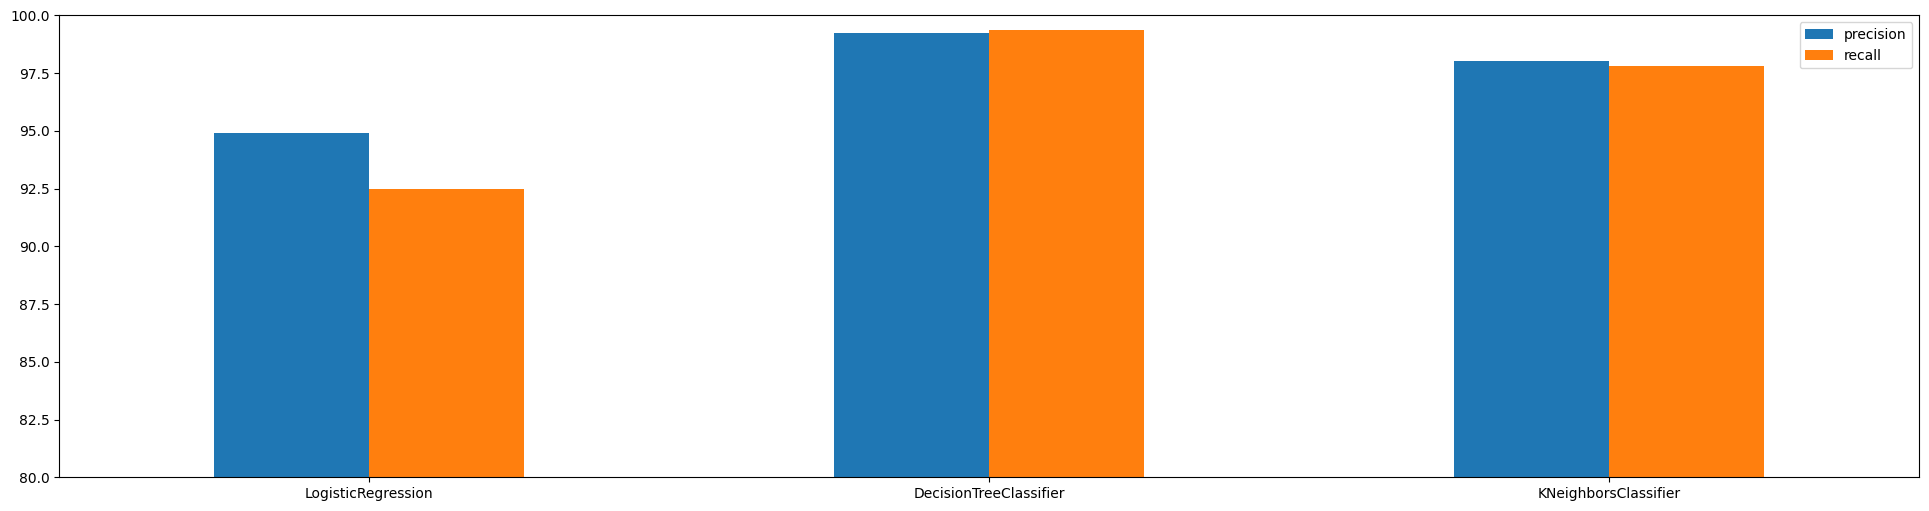

In [ ]:
for name in models:
  for scorer in ['precision', 'recall']:
    scores[name][scorer]= scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar", ylim=[80,100],figsize=(24,6), rot=0)

In [ ]:
models= {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc


In [ ]:
preds= {}
for name in models :
  models[name].fit(x_train, y_train)
  preds[name] = models[name].predict(x_test)
print("Predictions complete.")

Predictions complete.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name, sym="*"):
  return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
  print(line(name), name, 'Model Testing', line(name))
  print(confusion_matrix(y_test, preds[name]))
  print(line(name,'-'))
  print(classification_report(y_test, preds[name], target_names=target_names))

*************** KNeighborsClassifier Model Testing ***************
[[3471   45]
 [  71 3971]]
---------------
              precision    recall  f1-score   support

      normal       0.98      0.99      0.98      3516
     anamoly       0.99      0.98      0.99      4042

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558

**************** LogisticRegression Model Testing ****************
[[3267  249]
 [ 176 3866]]
----------------
              precision    recall  f1-score   support

      normal       0.95      0.93      0.94      3516
     anamoly       0.94      0.96      0.95      4042

    accuracy                           0.94      7558
   macro avg       0.94      0.94      0.94      7558
weighted avg       0.94      0.94      0.94      7558

************** DecisionTreeClassifier Model Testing **************
[[3500   16]
 [  23 4019]]
--------------
              pr

<Axes: >

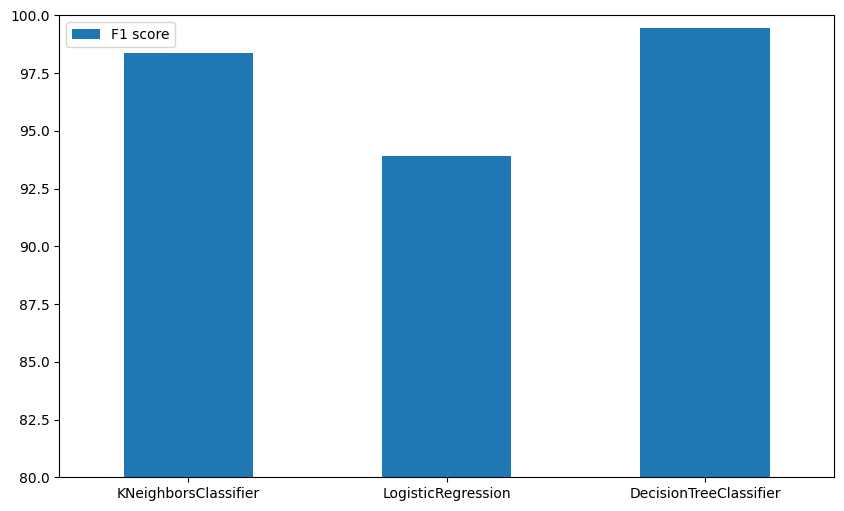

In [ ]:
f1s = {}
for name in models:
  # Set pos_label to 'anomaly' or 'normal' depending on which class you want to consider as positive
  f1s[name] = f1_score(y_test, preds[name], pos_label='anomaly')  # or pos_label='normal'
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1 score"])*100
f1s.plot(kind ="bar", ylim=[80,100],figsize=(10,6), rot=0)

In [ ]:
import pickle

# Example: Saving the RandomForest model from your dictionary
with open('intrusion_detection_model.pkl', 'wb') as f:
    # Use the correct key 'RandomForestClassifier' to access the model
    pickle.dump(models['DecisionTreeClassifier'], f)

In [ ]:
import pickle
import numpy as np

# Load the saved model
def load_model(path='/content/intrusion_detection_model.pkl'):
    with open(path, 'rb') as f:
        model = pickle.load(f)
    return model

# Inference function
def predict_intrusion(model, input_data):
    """
    Predicts whether the input data is normal or anomaly.

    Parameters:
        model: Trained and loaded model
        input_data: array-like, shape (n_samples, n_features)

    Returns:
        predictions: List of predicted class labels
    """
    if isinstance(input_data, list):
        input_data = np.array(input_data)

    # Ensure input is 2D
    if input_data.ndim == 1:
        input_data = input_data.reshape(1, -1)

    # Get the indices of the selected features from feature_map
    selected_feature_indices = [i for i, (is_selected, _) in enumerate(feature_map) if is_selected]

    # Ensure that the input data has the correct number of features
    num_selected_features = len(selected_feature_indices)
    if input_data.shape[1] != num_selected_features:
        raise ValueError(f"Input data should have {num_selected_features} features, but got {input_data.shape[1]}")

    # Slice the input data using the selected feature indices (only if necessary)
    # In this case, if the input data has already been preprocessed with feature selection,
    # you might not need this slicing step.
    # input_data = input_data[:, selected_feature_indices]

    predictions = model.predict(input_data)

    # Modified to handle string predictions directly:
    # If predictions contains strings, just return them as is
    if isinstance(predictions[0], str):
        return predictions.tolist()

    # Otherwise, proceed with converting to string labels using the index
    labels = ['normal', 'anomaly']
    return [labels[p] for p in predictions]

# Load model
model = load_model()

# Example new data sample with 10 features (adjust as needed)
new_sample = [0.1, 0.3, 0.5, 0.8, 0.2, 1.0, 0.9, 0.4, 0.6, 0.7]  # Replace with actual feature values, ensure it has 10 features

# Predict
result = predict_intrusion(model, new_sample)
print("Prediction:", result)

Prediction: ['normal']


In [ ]:
new_sample = [0.05, 0.1, 0.08, 0.12, 0.03, 0.2, 0.15, 0.0, 0.0, 0.0]
result = predict_intrusion(model, new_sample)
print("Prediction:", result)

Prediction: ['normal']


In [ ]:
# Example input for a "normal" class sample (10 features)
new_sample = [0.25, 0.35, 0.45, 0.30, 0.40, 0.50, 0.60, 0.55, 0.48, 0.52]
result = predict_intrusion(model, new_sample)
print("Prediction:", result)

Prediction: ['normal']


In [ ]:
new_sample = [5.0, 0.0, 0.0, 200.0, 0.0, 1000.0, 250.0, 1.0, 1.0, 1.0]
result = predict_intrusion(model, new_sample)
print("Prediction:", result)

Prediction: ['anomaly']


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pickle

# Load the saved model
@st.cache_resource
def load_model(path='/content/intrusion_detection_model.pkl'):
    with open(path, 'rb') as f:
        model = pickle.load(f)
    return model

# Prediction function
def predict_intrusion(model, input_data):
    if isinstance(input_data, list):
        input_data = np.array(input_data)

    if input_data.ndim == 1:
        input_data = input_data.reshape(1, -1)

    predictions = model.predict(input_data)

    if isinstance(predictions[0], str):
        return predictions.tolist()

    labels = ['normal', 'anomaly']
    return [labels[p] for p in predictions]

# Streamlit UI
st.title("Intrusion Detection System")

st.markdown("Enter the values for the 10 input features:")

input_values = []
for i in range(10):
    value = st.number_input(f"Feature {i+1}", value=0.0)
    input_values.append(value)

if st.button("Predict"):
    model = load_model()
    result = predict_intrusion(model, input_values)
    st.success(f"Prediction: {result[0]}")


Writing app.py


In [ ]:
!pip install streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 126.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.2 MB/s eta 0:00:00


In [ ]:
# Start the Streamlit app in the background
!streamlit run app.py &>/content/logs.txt &

# Wait a bit to let Streamlit start
import time
time.sleep(5)

# Create a tunnel to the Streamlit app
public_url = ngrok.connect(port=8501)
print(f"✅ Streamlit app is running: {public_url}")
